In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)
#mouse_data.head()

#Combine the data into a single dataset
mouse_trial_data = pd.merge(mouse_data, trial_data, how="left", on=["Mouse ID", "Mouse ID"])

#Display the data table for preview
mouse_trial_data

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = mouse_trial_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
mean_tumor_vol

# Convert to DataFrame
mean_tumor_vol = pd.DataFrame({"Tumor Volume (mm3)": mean_tumor_vol})

# Preview DataFrame
mean_tumor_vol

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stan_error_tumor = mouse_trial_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
stan_error_tumor

# Convert to DataFrame
tumor_vols_sem = pd.DataFrame({"Tumor Volume (mm3)":stan_error_tumor})

# Preview DataFrame
tumor_vols_sem

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vol = mean_tumor_vol.reset_index()
mean_tumor_pivot_vol = mean_tumor_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
mean_tumor_pivot_vol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


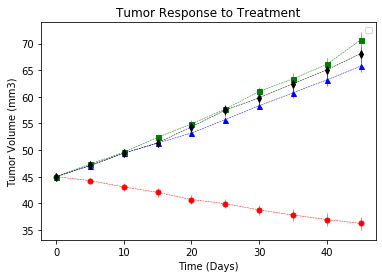

In [5]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_tumor_pivot_vol.index, mean_tumor_pivot_vol["Capomulin"], yerr=tumor_vols_pivot_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_tumor_pivot_vol.index, mean_tumor_pivot_vol["Infubinol"], yerr=tumor_vols_pivot_sem["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_tumor_pivot_vol.index, mean_tumor_pivot_vol["Ketapril"], yerr=tumor_vols_pivot_sem["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_tumor_pivot_vol.index, mean_tumor_pivot_vol["Placebo"], yerr=tumor_vols_pivot_sem["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid=True 
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig('tumor_response.png')

In [6]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = mouse_trial_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
mean_met
# Convert to DataFrame
mean_met_df = pd.DataFrame(mean_met)
# Preview DataFrame
mean_met_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_error = mouse_trial_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
met_sites_error
# Convert to DataFrame
met_sites_error_df = pd.DataFrame(met_sites_error)
# Preview DataFrame
met_sites_error_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_df = mean_met_df.reset_index()
mean_met_pivot_df = mean_met_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

met_sites_error = met_sites_error.reset_index()
met_sites_pivot_error = met_sites_error.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
mean_met_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


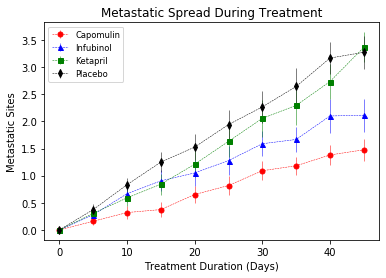

In [10]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_met_pivot_df.index, mean_met_pivot_df["Capomulin"], yerr=met_sites_pivot_error["Capomulin"], color='r', marker="o", markersize=5, linestyle='dashed', linewidth=0.50, label="Capomulin")
plt.errorbar(mean_met_pivot_df.index, mean_met_pivot_df["Infubinol"], yerr=met_sites_pivot_error["Infubinol"], color='b', marker="^", markersize=5, linestyle='dashed', linewidth=0.50, label="Infubinol")
plt.errorbar(mean_met_pivot_df.index, mean_met_pivot_df["Ketapril"], yerr=met_sites_pivot_error["Ketapril"], color='g', marker="s", markersize=5, linestyle='dashed', linewidth=0.50, label="Ketapril")
plt.errorbar(mean_met_pivot_df.index, mean_met_pivot_df["Placebo"], yerr=met_sites_pivot_error["Placebo"], color='k', marker="d", markersize=5, linestyle='dashed', linewidth=0.50, label="Placebo")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid=True
plt.legend(loc="best", fontsize="small", fancybox="True")

# Save the Figure
plt.savefig("tumor_spread.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = mouse_trial_data.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
survival_count

# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})

# Preview DataFrame
survival_count.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [12]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index= "Timepoint", columns= "Drug")["Mouse Count"]

# Preview the Data Frame
survival_count_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


No handles with labels found to put in legend.


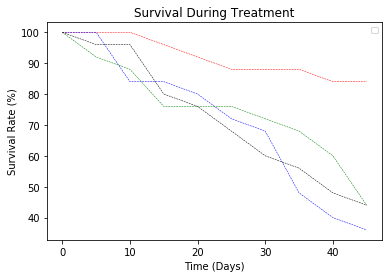

In [18]:
# Generate the Plot (Accounting for percentages)
numMice = 25

plt.plot(survival_count_pivot["Capomulin"] / numMice * 100, "r", linestyle="dashed", markersize=5, linewidth=.50)
plt.plot(survival_count_pivot["Infubinol"] / numMice * 100, "b", linestyle="dashed", markersize=5, linewidth=.50)
plt.plot(survival_count_pivot["Ketapril"] / numMice * 100, "g", linestyle="dashed", markersize=5, linewidth=.50)
plt.plot(survival_count_pivot["Placebo"] / numMice * 100, "k", linestyle="dashed", markersize=5, linewidth=.50)

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid=True
plt.legend(loc="best", fontsize="small", fancybox="True")

# Save the Figure
plt.savefig("tumor_survival.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
tumor_pct_change = 100 * (mean_tumor_pivot_vol.iloc[-1] - mean_tumor_pivot_vol.iloc[0]) / mean_tumor_pivot_vol.iloc[0]
tumor_pct_change_sem = 100 * (tumor_vols_pivot_sem.iloc[-1] - tumor_vols_pivot_sem.iloc[0]) / tumor_vols_pivot_sem.iloc[0]
# Display the data to confirm
tumor_pct_change.head()

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
dtype: float64

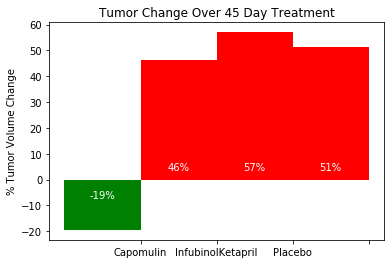

In [15]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"],
                tumor_pct_change["Infubinol"],
                tumor_pct_change["Ketapril"],
                tumor_pct_change["Placebo"])

pct_changes

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol' 'Ketapril', 'Placebo'))

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
        '%d%%' % int(height),
        ha='center', va='bottom', color='white')

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
        '%d%%' % int(height),
        ha='center', va='bottom', color='white')
        
# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
plt.savefig("tumor_change.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)